## 4.2 CP-decomposition (canonical polydic decomposition)

In [4]:
import numpy as np

### Unfolding (matricization)
def unfold(X, mode_number):
    """
    Unfolding (matricization)

    Parameters
    ----------
    X : ndarray
        Input tensor.
    mode_number : int
        Mode number along which to unfold.
        ``numpy's axis = (mode_number - 1)``

    Returns
    -------
    Y : ndarray
        Unfolded (Matrixed) tensor.
    """
    axis = mode_number - 1     # numpy's axis = (mode_number - 1)
    N = np.ndim(X)             # order of input tensor
    L = np.size(X)             # total number of input tensor elements
    col_len = np.size(X, axis) # column Length of output matrix
    row_len = int(L / col_len) # row Length of output matrix
    ### mode (axis) transpose
    permute = [axis] + list(range(0, axis)) + list(range(axis+1, N))
    X_transposed = np.transpose(X, permute)
    ### unfolding 
    unfolding_shape = (col_len, row_len)
    Y = np.reshape(X_transposed, unfolding_shape)
    return Y

### Folding (tensorization)
def fold(Y, mode_number, shape):
    """
    Unfolding (matricization)

    Parameters
    ----------
    Y : ndarray
        Input matrix.
    mode_number : int
        Mode number along which to fold.
        ``numpy's axis = (mode_number - 1)``
    shape : tuple or list of ints
        shape of folding (tensorization).

    Returns
    -------
    X : ndarray
        Folded (tensorized) matrix.
    """
    axis = mode_number - 1 # numpy's axis = (mode_number - 1)
    N = len(shape)         # order of output tensor
    ### folding
    permute = [axis] + list(range(0, axis)) + list(range(axis+1, N))
    folding_shape = []
    for i in permute: folding_shape.append(shape[i])
    Y_folded = np.reshape(Y, folding_shape)
    ### mode (axis) transpose
    if mode_number==1: permute_inv = list(range(0, N))
    else: permute_inv = list(range(1, axis+1)) + [0] + list(range(axis+1, N))
    X = np.transpose(Y_folded, permute_inv)
    return X

### n-th mode product of Tensor and Matrix
def n_mode_prod_TandM(Tensor, Matrix, mode_number):
    """
    n-th mode product of Tensor and Matrix

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Matrix : ndarray
        Input matrix.
    mode_number : int
        Mode number to calculate the product.
        ``numpy's axis = (mode_number - 1)``

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    axis = mode_number - 1          # numpy's axis = (mode_number - 1)
    tensor_shape = np.shape(Tensor) # tensor's shape
    ### new tensor's shape
    new_tensor_shape = np.copy(tensor_shape)
    new_tensor_shape[axis] = np.size(Matrix, 0)
    ### unfolding
    Tensor_unfolded = unfold(Tensor, mode_number)
    ### Matrix product of Tensor and Matrix
    matrix_product_TandM = np.matmul(Matrix, Tensor_unfolded)
    ### Folding
    Y = fold(matrix_product_TandM, mode_number, new_tensor_shape)
    return Y

### all-mode product of Tensor and Matrix
def all_mode_prod_TandM(Tensor, Matrix_list):
    """
    All mode product of Tensor and Matrix

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Matrix_list : list ``[ndarray, ndarray, ndarray,...]``
        Input matrices list.

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    ### all-mode product of Tensor and Matrix
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        ### n-th mode product of Tensor and Matrix
        mode_number = axis + 1
        Y = n_mode_prod_TandM(Y, Matrix, mode_number)
    return Y

### Reconstruct of rank-1 tensor
def recon_rank1_one_tensor(factor_vector_list):
    """
    Reconstruct of rank-1 tensor (outer product of factor vectors)

    Parameters
    ----------
    factor_vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input factor vectors list.

    Returns
    -------
    Tensor : ndarray
        Rank-1 tensor.
    """
    N = len(factor_vector_list) # total number of the factor vectors
    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    factor_matrix_list = []
    for vector in factor_vector_list: factor_matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))
    ### all-mode product of Tensor and Matrix
    ### (outer product of factor vectors)
    Tensor = all_mode_prod_TandM(np.ones([1]*N), factor_matrix_list)
    return Tensor

### leave-one-out product of Tensor and Vector
def leave_one_out_prod_TandV(Tensor, Vector_list, mode_number_leave_one_out):
    """
    Leave-one-out product of Tensor and Vector

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input  vectors list.
    mode_number_leave_one_out : int
        mode number of leave one out

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    Matrix_list = []
    for vector in Vector_list: Matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))
    ### all-mode product of Tensor and Vector
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        mode_number = axis + 1
        ### leave one out
        if mode_number==mode_number_leave_one_out: continue
        ### n-th mode product of Tensor and Matrix
        Y = n_mode_prod_TandM(Y, Matrix.T, mode_number)
    return Y

### all-mode product of Tensor and Vector
def all_mode_prod_TandV(Tensor, Vector_list):
    """
    All mode product of Tensor and Vector

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    Vector_list : list ``[ndarray, ndarray, ndarray,...]``
        Input  vectors list.

    Returns
    -------
    Y : ndarray
        Producted tensor.
    """
    ### matrixing of vectors
    ### shape(n,) --> shape(n, 1)
    Matrix_list = []
    for vector in Vector_list: Matrix_list.append(np.reshape(vector, (np.size(vector, 0), 1)))
    ### all-mode product of Tensor and Vector
    Y = np.copy(Tensor)
    for axis, Matrix in enumerate(Matrix_list):
        ### n-th mode product of Tensor and Matrix
        mode_number = axis + 1
        Y = n_mode_prod_TandM(Y, Matrix.T, mode_number)
    return Y

### 4.2.1 reconstruct of tensor based CP-decomposition

In [2]:
### Reconstruct of tensor base CP-decomposition
def recon_tensor_cp(factor_matrices_list):
    """
    econstruct of tensor base CP-decomposition

    Parameters
    ----------
    factor_matrices_list : list \n
        Input factor vectors list.\n
        ``[A, B, C,...]`` ( ``A`` is ndarray of shape(I, R) )\n
        I is vector's size, and R is rank.

    Returns
    -------
    Tensor : ndarray
        Tensor.
    """

    R = np.size(factor_matrices_list[0], 1) # rank of each factor matrices

    ### tensor's shape
    tensor_shape = []
    for factor_matrix in factor_matrices_list: tensor_shape.append(np.size(factor_matrix, 0))

    ### sum of rank1-tensors
    Tensor = np.zeros(tensor_shape)
    for r in range(R):
        rank = r + 1
        ### get rank-1 factor vectors from each factor matrices
        factor_vector_list = []
        for factor_matrix in factor_matrices_list: factor_vector_list.append(factor_matrix[:, r])
        ### reconstruct of rank-1 tensor (outer product of factor vectors)
        Tensor += recon_rank1_one_tensor(factor_vector_list)

    return Tensor

### Example
A_list = []
A_list.append(np.random.random((3, 3))) # A=[a1, a2, a3, ..., ar]
A_list.append(np.random.random((4, 3))) # B=[b1, b2, b3, ..., br]
A_list.append(np.random.random((5, 3))) # C=[c1, c2, c3, ..., cr]
X = recon_tensor_cp(A_list)

### 4.2.2 CP-decomposition using ALS

In [3]:
### CP decomposition using ALS(alternating least squares)
def cp_decomposition_als(Tensor, cp_rank, max_iter=10, initialize_type='random'):
    """
    CP decomposition using ALS(alternating least squares)

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    cp_rank : int
        CP rank (tensor rank).
    max_iter : int
        Maximum number of update iterations.
    initialize_type : str
        Type of initialize factor vectors.

    Returns
    -------
    Matrices_list : list ``[ndarray, ndarray, ndarray,...]``
        Factor matrices.
    Tensor_reconst : ndarray
        Reconstructed Tensor.
    cost_history : ndarray
        Cost transition.
    """
    
    N = np.ndim(Tensor)             # order of input tensor
    tensor_shape = np.shape(Tensor) # tensor's shape

    ### initialize factor matrices
    Matrices_list = []
    if initialize_type=='zeros': 
        for size in tensor_shape: Matrices_list.append(np.zeros((size, cp_rank)))
    if initialize_type=='ones': 
        for size in tensor_shape: Matrices_list.append(np.ones((size, cp_rank)))
    if initialize_type=='random': 
        for size in tensor_shape: Matrices_list.append(np.random.random((size, cp_rank)))

    cost = []
    for _ in range(max_iter):

        for i in range(N):
            mode_number = i + 1

            ### caluculate H{i}
            H_i = np.ones((cp_rank, cp_rank))
            for j in range(N):
                if j==i: continue # i=j is skip
                H_i *= np.matmul(Matrices_list[j].T, Matrices_list[j])

            ### caluculate G{i}
            G_i = np.zeros((tensor_shape[i], cp_rank))
            for j in range(cp_rank):
                ### get vector list
                Vector_list = []
                for Matrices in Matrices_list: Vector_list.append(Matrices[:, j])
                ### caluculate G{i}
                G_i[:, j] = np.reshape(leave_one_out_prod_TandV(Tensor, Vector_list, mode_number), tensor_shape[i])

            ### caluculate A{i} H{i} = G{i}
            A_i = np.linalg.solve(H_i.T, G_i.T).T
            Matrices_list[i] = A_i

        ### tensor reconstruction
        Tensor_reconst = recon_tensor_cp(Matrices_list)
        ### cost
        cost.append((np.linalg.norm(Tensor) - np.linalg.norm(Tensor_reconst))**2)
    cost_history = np.array(cost)

    return Matrices_list, Tensor_reconst, cost_history

### Example
A_list = []
A_list.append(np.random.random((10, 10))) # A=[a1, a2, a3, ..., ar]
A_list.append(np.random.random((10, 10))) # B=[b1, b2, b3, ..., br]
#A_list.append(np.random.random((5, 3))) # C=[c1, c2, c3, ..., cr]
X = recon_tensor_cp(A_list)
A_hat, X_hat, cost = cp_decomposition_als(X, 10)

### 4.2.3 CP-decomposition using HALS

In [54]:
### CP decomposition using HALS (hierarchical alternative least squares)
def cp_decomposition_hals(Tensor, cp_rank, n_updates=10, max_iter=10, initialize_type='random'):
    """
    CP decomposition using HALS (hierarchical alternative least squares)

    Parameters
    ----------
    Tensor : ndarray
        Input tensor.
    cp_rank : int
        CP rank (tensor rank).
    n_updates : int
        Number of updates.
    max_iter : int
        Maximum number of update iterations.
    initialize_type : str
        Type of initialize factor vectors.

    Returns
    -------
    Matrices_list : list ``[ndarray, ndarray, ndarray,...]``
        Factor matrices.
    Tensor_reconst : ndarray
        Reconstructed Tensor.
    cost_history : ndarray
        Cost transition.
    """
    
    N = np.ndim(Tensor)             # order of input tensor
    tensor_shape = np.shape(Tensor) # tensor's shape

    ### initialize factor matrices
    Matrices_list = []
    if initialize_type=='zeros': 
        for size in tensor_shape: Matrices_list.append(np.zeros((size, cp_rank)))
    if initialize_type=='ones': 
        for size in tensor_shape: Matrices_list.append(np.ones((size, cp_rank)))
    if initialize_type=='random': 
        for size in tensor_shape: Matrices_list.append(np.random.random((size, cp_rank)))

    error = Tensor - recon_tensor_cp(Matrices_list) # residual error

    cost = []
    for _ in range(max_iter):

        for i in range(cp_rank):

            ### get rank i-th vector list
            Vector_list = []
            for Matrices in Matrices_list: Vector_list.append(Matrices[:, i])
            ### addition of rank i-th tensor to the residual error
            Y = error + recon_rank1_one_tensor(Vector_list)

            ### update
            for _ in range(n_updates):
                
                for j in range(N):
                    mode_number = j + 1
                    y = np.reshape(leave_one_out_prod_TandV(Y, Vector_list, mode_number), tensor_shape[j])
                    Vector_list[j] = y / np.linalg.norm(y)
                    Matrices_list[j][:, i] = Vector_list[j]

            ### scale coefficient
            lam = all_mode_prod_TandV(Tensor, Vector_list)
            ### update residual error
            error = Y - lam * recon_rank1_one_tensor(Vector_list)
            ### 1-st factor vector retention
            Matrices_list[0][:, i] = lam * Vector_list[0]

        ### cost
        cost.append(np.linalg.norm(error)**2)
    cost_history = np.array(cost)

    ### tensor reconstruction
    Tensor_reconst = recon_tensor_cp(Matrices_list)

    return Matrices_list, Tensor_reconst, cost_history

### Example
A_list = []
A_list.append(np.random.random((20, 3))) # A=[a1, a2, a3, ..., ar]
A_list.append(np.random.random((20, 3))) # B=[b1, b2, b3, ..., br]
#A_list.append(np.random.random((20, 3))) # C=[c1, c2, c3, ..., cr]
X = recon_tensor_cp(A_list)
A_hat, X_hat, cost = cp_decomposition_hals(X, 3, 1, 100)

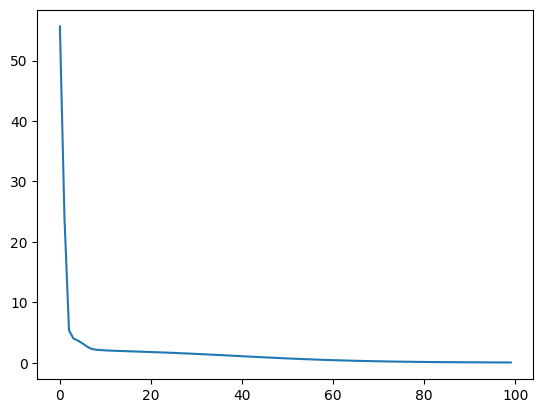

In [55]:
plt.plot(cost)

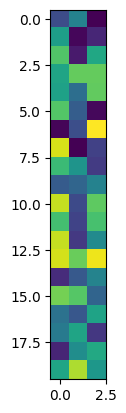

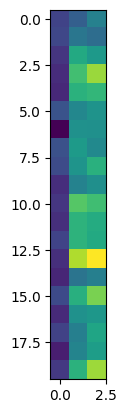

In [57]:
import matplotlib.pylab as plt

i = 0

plt.imshow(A_list[i])
plt.show()

plt.imshow(A_hat[i])
plt.show()

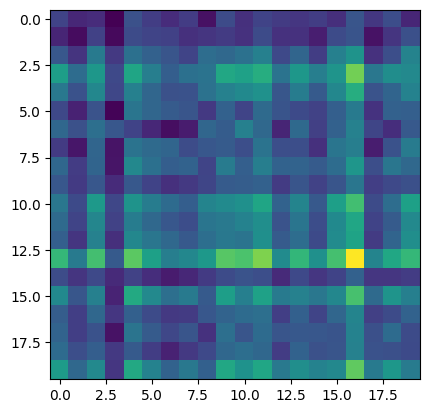

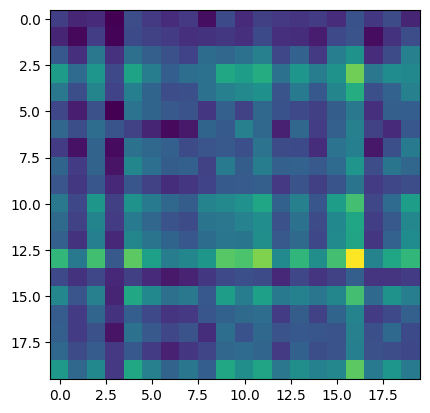

In [58]:
import matplotlib.pylab as plt

i = 0

plt.imshow(X)
plt.show()

plt.imshow(X_hat)
plt.show()